# ĐỒ ÁN THỰC HÀNH - LT4KHDL

## A. Thu thập dữ liệu

### I. Giới thiệu chủ đề và thông tin tập dữ liệu


#### 1. Chủ đề
Tên chủ đề: Data Science Job Salaries

Tạm dịch: Mức lương cho công việc Khoa học dữ liệu

#### 2. Lý do lựa chọn chủ đề và tập dữ liệu
"Mức lương cho công việc Khoa học dữ liệu" là một trong những chủ đề hấp dẫn mang tính thực tế, hiện đang nhận được sự quan tâm lớn từ cộng đồng người theo học và làm việc trong lĩnh vực Khoa học dữ liệu.

Giúp cho những người quan tâm tới lĩnh vực Khoa học dữ liệu:

- Có cái nhìn tổng quát về sự thay đổi trong lĩnh vực này  từ năm 2020 đến hiện tại.
- Nắm bắt được xu thế làm việc và mức lương giữa các nghành nghề đang diễn ra trên thế giới.
- Cung cấp nhiều thông tin bổ ích nhằm đưa ra những định hướng về công việc trong tương lai.

Nguồn dữ liệu có sẵn với quy mô đóng góp trên toàn thế giới, đang được thu thập và cập nhật liên tục từ năm 2020 đến thời điểm hiện tại (thường là trên cơ sở hàng tuần). Bộ dữ liệu được công bố trong phạm vi công cộng, người dùng có thể truy cập và tải tập dữ liệu một cách dễ dàng.



#### 3. Thông tin tập dữ liệu
Nguồn gốc: https://salaries.ai-jobs.net/

Phương pháp thu thập: 
- Trang web cung cấp cho người dùng một biểu mẫu ngắn để trả lời khảo sát về công việc và mức lương hiện tại trong lĩnh vực Khoa học dữ liệu. Mọi thông tin của người dùng sẽ được ẩn danh. 
- Người dùng có thể đóng góp vào bộ dữ liệu bất cứ lúc nào và chỉ tốn chưa đầy một phút để hoàn thành biểu mẫu (được đính kèm hình ảnh bên dưới).


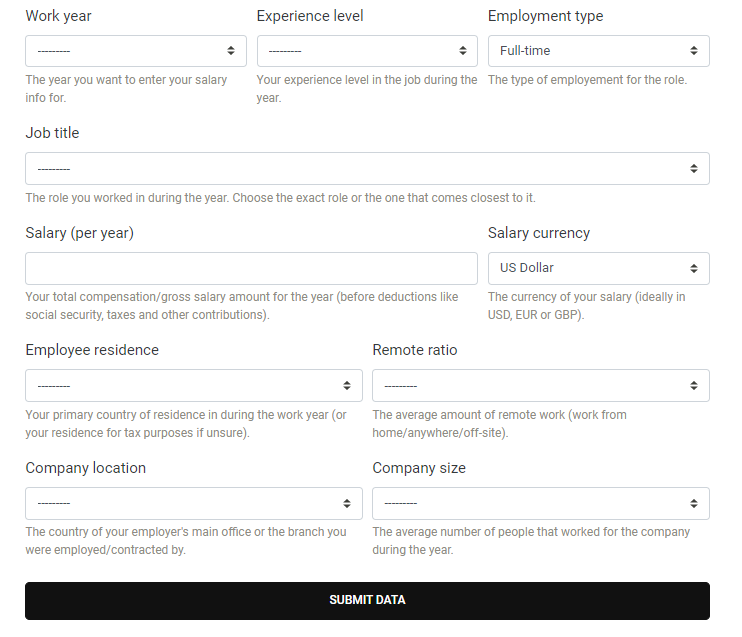

Giấy phép: Toàn bộ bộ dữ liệu được công bố trong phạm vi công cộng theo giấy phép CC0 (Public Domain).


### II. Tổng quan về cấu trúc tập dữ liệu

#### 1. Thời điểm thu thập dữ liệu
Tập dữ liệu được nhóm thống nhất tải ở dạng file csv vào ngày 13/11/2022, gồm 1423 dòng dữ liệu được trang web https://salaries.ai-jobs.net/ ghi nhận.
#### 2. Cấu trúc tập dữ liệu
Tập dữ liệu được tải xuống về cơ bản chứa một bảng duy nhất, gồm 11 thuộc tính với tất cả thông tin được cấu trúc và mô tả như sau:
- **work_year**: The year the salary was paid. 
- **experience_level**: The experience level in the job during the year with the following possible values
     - **EN** Entry-level
     - **MI** Junior Mid-level
     - **SE** Intermediate Senior-level
     - **EX** Expert Executive-level / Director
- **employment_type**:	The type of employement for the role
     - **PT** Part-time 
     - **FT** Full-time 
     - **CT** Contract 
     - **FL** Freelance
- **job_title**: The role worked in during the year.
- **salary**: The total gross salary amount paid.
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via [fxdata.foorilla.com](https://fxdata.foorilla.com/).
- **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio**: The overall amount of work done remotely, possible values are as follows
     - **0** No remote work (less than 20%) 
     - **50** Partially remote 
     - **100** Fully remote (more than 80%)
- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size**: The average number of people that worked for the company during the year
     - **S** less than 50 employees (small) 
     - **M** 50 to 250 employees (medium) 
     - **L** more than 250 employees (large)

# B. Khám phá dữ liệu

## I. Tổng quan bộ dữ liệu

### 1. Đọc dữ liệu và tính số dòng và cột

Đầu tiên ta import các thư viện cần thiết.

In [147]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# .. import more libraries

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import country_converter as coco




Tiếp đến đọc file `"salaries.csv"` vào dataframe `salaries_df` và in ra 5 dòng đầu tiên của dataframe.

In [148]:
salaries_df = pd.read_csv('salaries.csv')
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Scientist,205000,USD,205000,US,100,US,M
1,2022,SE,FT,Data Scientist,185000,USD,185000,US,100,US,M
2,2022,SE,FT,Data Scientist,185900,USD,185900,US,0,US,M
3,2022,SE,FT,Data Scientist,129300,USD,129300,US,0,US,M
4,2022,SE,FT,Machine Learning Engineer,247500,USD,247500,US,0,US,M


Tính số dòng và số cột và lưu vào 2 biến `num_rows` và `num_cols`.

In [149]:
num_rows, num_cols = salaries_df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1423
Number of columns: 11


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Như đã được đề cập ở trên, dữ liệu được thu thập bằng cách điền vào một biểu mẫu trên trang web [https://salaries.ai-jobs.net/](https://salaries.ai-jobs.net/). Mỗi dòng trong tập dữ liệu này tương ứng với một bản ghi của một người dùng đã điền vào biểu mẫu. Mỗi dòng chứa các thông tin về thu nhập của người dùng trong một năm cụ thể, vị trí công việc, kinh nghiệm, quốc gia, loại hình công việc, v.v. Do vậy, ta có thể thấy rằng không có dòng nào bị "lạc loài".

### 3. Dữ liệu có các dòng bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương `duplicated()` và `any()` trên dataframe `salaries_df` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [150]:
have_duplicate_rows = salaries_df.duplicated().any()
have_duplicate_rows

True

Do vậy, ta có thể thấy rằng dữ liệu có các dòng bị lặp. Tuy vậy, ta không bỏ đi các dòng bị lặp vì tính chất của dữ liệu. Hai người khác nhau có thể có các thông tin thu nhập giống nhau trong một năm cụ thể.

### 4. Tỉ lệ giá trị thiếu và thống kê mô tả của từng cột

Ta cũng cần xem xét đến các giá trị thiếu trong dữ liệu. Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức `isnull()` trên dataframe `salaries_df` và tính tổng số giá trị thiếu của từng cột bằng phương thức `sum()`. Cuối cùng ta chia số dòng và lưu kết quả vào `missing_ratio`.

In [151]:
missing_ratio = salaries_df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

Có thể thấy, tỉ lệ giá trị thiếu đều là 0. Do vậy, ta kết luận rằng dữ liệu không có giá trị thiếu.

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức `describe()` trên dataframe `salaries_df`.

In [152]:
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1423.000000,1.423000e+03,1423.000000,1423.000000
mean,2021.735770,2.362726e+05,124448.492621,62.579058
std,0.547754,1.056179e+06,64414.030155,45.776892
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2022.000000,8.166600e+04,78000.000000,0.000000
50%,2022.000000,1.300000e+05,123648.000000,100.000000
75%,2022.000000,1.775500e+05,165400.000000,100.000000
max,2022.000000,3.040000e+07,450000.000000,100.000000


### 5. Kiểu dữ liệu của mỗi cột

Ta sử dụng phương thức `dtypes` trên dataframe `salaries_df` để xem kiểu dữ liệu của mỗi cột. Kết quả được lưu vào series `col_dtypes`; series này có index là tên các cột và giá trị là kiểu dữ liệu của các cột tương ứng.

In [153]:
col_dtype = salaries_df.dtypes
col_dtype

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

#### Nhận xét
- Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu này đã ở định dạng phù hợp, nên không cần phải xử lý.

### 6. Xem xét tập giá trị của các thuộc tính phân loại

In [154]:
set(salaries_df['work_year'].to_list())

{2020, 2021, 2022}

In [155]:
set(salaries_df['experience_level'].to_list())

{'EN', 'EX', 'MI', 'SE'}

In [156]:
set(salaries_df['employment_type'].to_list())

{'CT', 'FL', 'FT', 'PT'}

In [157]:
set(salaries_df['remote_ratio'].to_list())

{0, 50, 100}

In [158]:
set(salaries_df['company_size'].to_list())

{'L', 'M', 'S'}

In [159]:
set(salaries_df['employee_residence'].to_list())

{'AE',
 'AR',
 'AT',
 'AU',
 'AX',
 'BE',
 'BG',
 'BO',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CR',
 'CZ',
 'DE',
 'DK',
 'DO',
 'DZ',
 'EE',
 'EG',
 'ES',
 'FI',
 'FR',
 'GB',
 'GR',
 'HK',
 'HN',
 'HR',
 'HU',
 'ID',
 'IE',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JE',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'RO',
 'RS',
 'RU',
 'SG',
 'SI',
 'SK',
 'TH',
 'TN',
 'TR',
 'UA',
 'US',
 'VN'}

In [160]:
set(salaries_df['company_location'].to_list())

{'AE',
 'AL',
 'AR',
 'AS',
 'AT',
 'AU',
 'BE',
 'BO',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'EG',
 'ES',
 'FI',
 'FR',
 'GB',
 'GR',
 'HN',
 'HR',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'RO',
 'RU',
 'SG',
 'SI',
 'SK',
 'TH',
 'TR',
 'UA',
 'US',
 'VN'}

In [161]:
set(salaries_df['job_title'].to_list())

{'3D Computer Vision Researcher',
 'AI Scientist',
 'Analytics Engineer',
 'Applied Data Scientist',
 'Applied Machine Learning Scientist',
 'Applied Scientist',
 'BI Analyst',
 'BI Data Analyst',
 'Big Data Architect',
 'Big Data Engineer',
 'Business Data Analyst',
 'Cloud Data Architect',
 'Cloud Data Engineer',
 'Computer Vision Engineer',
 'Computer Vision Software Engineer',
 'Data Analyst',
 'Data Analytics Consultant',
 'Data Analytics Engineer',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Architect',
 'Data Engineer',
 'Data Engineering Manager',
 'Data Manager',
 'Data Operations Analyst',
 'Data Operations Engineer',
 'Data Science Consultant',
 'Data Science Engineer',
 'Data Science Lead',
 'Data Science Manager',
 'Data Science Tech Lead',
 'Data Scientist',
 'Data Scientist Lead',
 'Data Specialist',
 'Director of Data Engineering',
 'Director of Data Science',
 'ETL Developer',
 'Finance Data Analyst',
 'Financial Data Analyst',
 'Head of Data',
 'Head of 

#### Nhận xét 1:
Cách hiển thị giá trị bằng ký hiệu viết tắt ở một số thuộc tính sau có thể gây khó khăn hoặc nhầm lẫn cho người xem:
- experience_level
- employment_type
- employee_residence
- remote_ratio
- company_location
- company_size

#### Giải pháp:
Thay thế giá trị của các thuộc tính bị viết tắt thành từ đầy đủ nhằm để hiểu rõ ràng về dữ liệu và phục phụ cho quá trình trực quan hóa được rõ ràng hơn.

#### Thực hiện tiền xử lý:

In [162]:
# Experience Level
experience_level_dict={'EN':'Entry-level / Junior',
                       'MI':'Mid-level / Intermediate',
                       'SE':'Senior-level / Expert',
                       'EX':'Executive-level / Director'
                      }
salaries_df['experience_level']=salaries_df['experience_level'].map(experience_level_dict)

# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}
salaries_df['employment_type'] = salaries_df['employment_type'].map(employment_type_dict)

# Remote_ratio
salaries_df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)
salaries_df['remote_ratio']=salaries_df['remote_ratio'].astype(object)

#Employee Residence & Company location
## Mã Quốc gia chuẩn ISO
ISO3166 = {'AD': 'Andorra','AE': 'United Arab Emirates','AF': 'Afghanistan','AG': 'Antigua & Barbuda','AI': 'Anguilla',
           'AL': 'Albania','AM': 'Armenia','AN': 'Netherlands Antilles','AO': 'Angola','AQ': 'Antarctica','AR': 'Argentina',
           'AS': 'American Samoa','AT': 'Austria','AU': 'Australia','AW': 'Aruba','AZ': 'Azerbaijan','BA': 'Bosnia and Herzegovina',
           'BB': 'Barbados','BD': 'Bangladesh','BE': 'Belgium','BF': 'Burkina Faso','BG': 'Bulgaria','BH': 'Bahrain','BI': 'Burundi',
           'BJ': 'Benin','BM': 'Bermuda','BN': 'Brunei Darussalam','BO': 'Bolivia','BR': 'Brazil','BS': 'Bahama','BT': 'Bhutan',
           'BU': 'Burma (no longer exists)','BV': 'Bouvet Island','BW': 'Botswana','BY': 'Belarus','BZ': 'Belize','CA': 'Canada',
           'CC': 'Cocos (Keeling) Islands','CF': 'Central African Republic','CG': 'Congo','CH': 'Switzerland','CI': 'Côte D\'ivoire (Ivory Coast)',
           'CK': 'Cook Iislands','CL': 'Chile','CM': 'Cameroon','CN': 'China','CO': 'Colombia','CR': 'Costa Rica','CS': 'Czechoslovakia (no longer exists)',
           'CU': 'Cuba','CV': 'Cape Verde','CX': 'Christmas Island','CY': 'Cyprus','CZ': 'Czech Republic','DD': 'German Democratic Republic (no longer exists)',
           'DE': 'Germany','DJ': 'Djibouti','DK': 'Denmark','DM': 'Dominica','DO': 'Dominican Republic','DZ': 'Algeria','EC': 'Ecuador',
           'EE': 'Estonia','EG': 'Egypt','EH': 'Western Sahara','ER': 'Eritrea','ES': 'Spain','ET': 'Ethiopia','FI': 'Finland','FJ': 'Fiji',
           'FK': 'Falkland Islands (Malvinas)','FM': 'Micronesia','FO': 'Faroe Islands','FR': 'France','FX': 'France, Metropolitan','GA': 'Gabon',
           'GB': 'United Kingdom (Great Britain)','GD': 'Grenada','GE': 'Georgia','GF': 'French Guiana','GH': 'Ghana','GI': 'Gibraltar',
           'GL': 'Greenland','GM': 'Gambia','GN': 'Guinea','GP': 'Guadeloupe','GQ': 'Equatorial Guinea','GR': 'Greece','GS': 'South Georgia and the South Sandwich Islands',
           'GT': 'Guatemala','GU': 'Guam','GW': 'Guinea-Bissau','GY': 'Guyana','HK': 'Hong Kong','HM': 'Heard & McDonald Islands','HN': 'Honduras',
           'HR': 'Croatia','HT': 'Haiti','HU': 'Hungary','ID': 'Indonesia','IE': 'Ireland','IL': 'Israel','IN': 'India','IO': 'British Indian Ocean Territory',
           'IQ': 'Iraq','IR': 'Islamic Republic of Iran','IS': 'Iceland','IT': 'Italy','JM': 'Jamaica','JO': 'Jordan','JP': 'Japan','KE': 'Kenya',
           'KG': 'Kyrgyzstan','KH': 'Cambodia','KI': 'Kiribati','KM': 'Comoros','KN': 'St. Kitts and Nevis','KP': 'Korea, Democratic People\'s Republic of',
           'KR': 'Korea, Republic of','KW': 'Kuwait','KY': 'Cayman Islands','KZ': 'Kazakhstan','LA': 'Lao People\'s Democratic Republic','LB': 'Lebanon',
           'LC': 'Saint Lucia','LI': 'Liechtenstein','LK': 'Sri Lanka','LR': 'Liberia','LS': 'Lesotho','LT': 'Lithuania','LU': 'Luxembourg','LV': 'Latvia',
           'LY': 'Libyan Arab Jamahiriya','MA': 'Morocco','MC': 'Monaco','MD': 'Moldova, Republic of','MG': 'Madagascar','MH': 'Marshall Islands','ML': 'Mali',
           'MN': 'Mongolia','MM': 'Myanmar','MO': 'Macau','MP': 'Northern Mariana Islands','MQ': 'Martinique','MR': 'Mauritania','MS': 'Monserrat','MT': 'Malta',
           'MU': 'Mauritius','MV': 'Maldives','MW': 'Malawi','MX': 'Mexico','MY': 'Malaysia','MZ': 'Mozambique','NA': 'Namibia','NC': 'New Caledonia','NE': 'Niger',
           'NF': 'Norfolk Island','NG': 'Nigeria','NI': 'Nicaragua','NL': 'Netherlands','NO': 'Norway','NP': 'Nepal','NR': 'Nauru','NT': 'Neutral Zone (no longer exists)',
           'NU': 'Niue','NZ': 'New Zealand','OM': 'Oman','PA': 'Panama','PE': 'Peru','PF': 'French Polynesia','PG': 'Papua New Guinea','PH': 'Philippines','PK': 'Pakistan',
           'PL': 'Poland','PM': 'St. Pierre & Miquelon','PN': 'Pitcairn','PR': 'Puerto Rico','PT': 'Portugal','PW': 'Palau','PY': 'Paraguay','QA': 'Qatar','RE': 'Réunion',
           'RO': 'Romania','RU': 'Russian Federation','RW': 'Rwanda','SA': 'Saudi Arabia','SB': 'Solomon Islands','SC': 'Seychelles','SD': 'Sudan','SE': 'Sweden',
           'SG': 'Singapore','SH': 'St. Helena','SI': 'Slovenia','SJ': 'Svalbard & Jan Mayen Islands','SK': 'Slovakia','SL': 'Sierra Leone','SM': 'San Marino',
           'SN': 'Senegal','SO': 'Somalia','SR': 'Suriname','ST': 'Sao Tome & Principe','SU': 'Union of Soviet Socialist Republics (no longer exists)',
           'SV': 'El Salvador','SY': 'Syrian Arab Republic','SZ': 'Swaziland','TC': 'Turks & Caicos Islands','TD': 'Chad','TF': 'French Southern Territories',
           'TG': 'Togo','TH': 'Thailand','TJ': 'Tajikistan','TK': 'Tokelau','TM': 'Turkmenistan','TN': 'Tunisia','TO': 'Tonga','TP': 'East Timor',
           'TR': 'Turkey','TT': 'Trinidad & Tobago','TV': 'Tuvalu','TW': 'Taiwan, Province of China','TZ': 'Tanzania, United Republic of','UA': 'Ukraine',
           'UG': 'Uganda','UM': 'United States Minor Outlying Islands','US': 'United States of America','UY': 'Uruguay','UZ': 'Uzbekistan',
           'VA': 'Vatican City State (Holy See)','VC': 'St. Vincent & the Grenadines','VE': 'Venezuela','VG': 'British Virgin Islands',
           'VI': 'United States Virgin Islands','VN': 'Viet Nam','VU': 'Vanuatu','WF': 'Wallis & Futuna Islands','WS': 'Samoa','YD': 'Democratic Yemen (no longer exists)',
           'YE': 'Yemen','YT': 'Mayotte','YU': 'Yugoslavia','ZA': 'South Africa','ZM': 'Zambia','ZR': 'Zaire','ZW': 'Zimbabwe','ZZ': 'Unknown or unspecified country',
}

salaries_df['employee_residence'] = salaries_df['employee_residence'].map(ISO3166)
salaries_df['company_location'] = salaries_df['company_location'].map(ISO3166)

#Company Size
company_size_dict={'S': 'Small',
                  'M':'Medium',
                  'L':'Large'}
salaries_df.company_size=salaries_df['company_size'].map(company_size_dict)

#### Nhận xét 2:
- Có rất nhiều thể loại công việc được liệt kê ở đây (65 loại).
- Xuất hiện rất nhiều những tiêu đề công việc có thể xếp chung vào một lĩnh vực:
     - Vd: Financial Data Analyst, Product Data Analyst, Business Data Analyst,...có thể gọi chung là Data Analyst.
     - Vd: Cloud Data Architect, Principal Data Architect, Big Data Architect',...có thể gọi chung là Data Architect.
- Thậm chí xuất hiện một số công việc được thể hiện ở cả 2 loại tên (điều này có thể xem xét là sự trùng lặp):
     - Vd: Machine Learning Engineer và ML Engineer đều được hiểu là Machine Learning Engineer.
     - Vd: Financial Data Analyst và Finance Data Analyst.
- Tác hại: chưa nghĩ ra :(

#### Giải pháp:
Để phù hợp với mục đích khám phá và phân tích dữ liệu, chúng ta sẽ phân chia các tiêu đề công việc vào các thùng tổng quát thích hợp. Ở đây nhóm đã phân loại và chia thành các nhóm chính sau:
- Data Scientist                
- Data Engineer                 
- Data Analyst
- Data Architect
- Machine Learning Engineer                     
- Machine Learning Scientist
- Computer Vision Engineer
- NLP Engineer
- Research Scientist                  
- AI Scientist
- Applied Scientist

#### Thực hiện tiền xử lý:

In [163]:
#mapping the new classification type
employment_classification = {'Data Scientist':'Data Scientist',
                             'Principal Data Scientist':'Data Scientist',
                             'Applied Data Scientist':'Data Scientist',
                             'Data Science Manager':'Data Scientist',
                             'Head of Data Science':'Data Scientist',
                             'Director of Data Science':'Data Scientist',
                             'Staff Data Scientist':'Data Scientist',
                             'Data Science Consultant':'Data Scientist',
                             'Data Science Engineer':'Data Scientist',
                             'Head of Data':'Data Scientist',
                             'Lead Data Scientist':'Data Scientist',
                             'Data Scientist Lead':'Data Scientist',
                             'Data Science Lead':'Data Scientist',
                             'Product Data Scientist':'Data Scientist',
                             'Data Specialist':'Data Scientist',
                             
                             'Big Data Engineer':'Data Engineer',
                             'Data Engineer':'Data Engineer',
                             'Principal Data Engineer':'Data Engineer',
                             'Data Operations Engineer':'Data Engineer',
                             'Lead Data Engineer':'Data Engineer',
                             'Director of Data Engineering':'Data Engineer',
                             'Research Engineer':'Data Engineer',
                             'Data Engineering Manager':'Data Engineer',
                             'Cloud Data Engineer':'Data Engineer',
                             'Data Science Tech Lead':'Data Engineer',
                             'Data Manager':'Data Engineer',
                             'ETL Developer':'Data Engineer',

                             'Product Data Analyst':'Data Analyst',
                             'Data Analyst':'Data Analyst',
                             'Business Data Analyst':'Data Analyst',
                             'Data Science Consultant':'Data Analyst',
                             'BI Data Analyst':'Data Analyst',
                             'BI Analyst':'Data Analyst',
                             'Lead Data Analyst':'Data Analyst',
                             'Data Analytics Engineer':'Data Analyst',
                             'Marketing Data Analyst':'Data Analyst',
                             'Financial Data Analyst':'Data Analyst',
                             'Finance Data Analyst':'Data Analyst',
                             'Principal Data Analyst':'Data Analyst',
                             'Data Analytics Manager':'Data Analyst',
                             'Data Analytics Lead':'Data Analyst',
                             'Analytics Engineer':'Data Analyst',
                             'Data Operations Analyst':'Data Analyst',
                             'Data Analytics Consultant':'Data Analyst',
                             'Power BI Developer':'Data Analyst',
                             
                             'Machine Learning Scientist':'Machine Learning Scientist',
                             'Applied Machine Learning Scientist':'Machine Learning Scientist',
                             'Machine Learning Research Engineer':'Machine Learning Scientist',
                             'Head of Machine Learning':'Machine Learning Scientist',
                             'Machine Learning Manager':'Machine Learning Scientist',
                             
                             'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                             'Machine Learning Engineer':'Machine Learning Engineer',
                             'ML Engineer':'Machine Learning Engineer',
                             'Lead Machine Learning Engineer':'Machine Learning Engineer',
                             'Machine Learning Developer':'Machine Learning Engineer',
                             
                             'Data Architect':'Data Architect',
                             'Cloud Data Architect':'Data Architect',
                             'Principal Data Architect':'Data Architect',
                             'Big Data Architect':'Data Architect',
                             
                             'Computer Vision Engineer':'Computer Vision Engineer',
                             'Computer Vision Software Engineer':'Computer Vision Engineer',
                             '3D Computer Vision Researcher':'Computer Vision Engineer',
                             
                             'NLP Engineer':'NLP Engineer',
                             'AI Scientist':'AI Scientist',
                             'Research Scientist':'Research Scientist',
                             'Applied Scientist':'Applied Scientist',
                            }

salaries_df["job_title"] = salaries_df["job_title"].map(employment_classification)

In [164]:
salaries_df["job_title"]

0                  Data Scientist
1                  Data Scientist
2                  Data Scientist
3                  Data Scientist
4       Machine Learning Engineer
                  ...            
1418               Data Scientist
1419               Data Scientist
1420               Data Scientist
1421                 Data Analyst
1422               Data Scientist
Name: job_title, Length: 1423, dtype: object

### 7. Xem xét sự phân bố giá trị của các cột dữ liệu dạng số.

In [165]:
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

Ta thấy sau các bước tiền xử lý ở trên có 3 cột dữ liệu kiểu số là: work_year, salary, salary_in_usd.

Thực hiện thống kê trên 3 cột này và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Giá trị min (min).
- Giá trị lower quartile (phân vị 25) (lower_quartile).
- Giá trị median (phân vị 50) (median).
- Giá trị upper quartile (phân vị 75) (upper_quartile).
- Giá trị max (max).

In [166]:
numeric_df=salaries_df.copy()
numeric_df=numeric_df[['work_year', 'salary', 'salary_in_usd']]
columns=list(numeric_df.columns)
titles=['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max']
arrays=numeric_df.to_numpy()
num_col_dict={}
num_col_vals=[]
for i in range(len(columns)):
    temp=[]
    temp.append(((sum(np.isnan(arrays[:,i]))/arrays.shape[0])*100).round(3))
    temp.append(np.nanmin(arrays[:,i],axis=0).round(1))
    temp.append(np.nanpercentile(arrays[:,i],25,axis=0).round(3))
    temp.append(np.nanpercentile(arrays[:,i],50,axis=0).round(3))
    temp.append(np.nanpercentile(arrays[:,i],75,axis=0).round(3))
    temp.append(np.nanmax(arrays[:,i],axis=0).round(3))
    num_col_vals.append(temp)
for i in range(len(columns)):
    num_col_dict[columns[i]]=num_col_vals[i]
    num_col_dict['titles']=titles
numeric_info_df=pd.DataFrame(num_col_dict).set_index('titles')
numeric_info_df

,work_year,salary,salary_in_usd
titles,,,
missing_ratio,0.0,0.0,0.0
min,2020.0,2324.0,2324.0
lower_quartile,2022.0,81666.0,78000.0
median,2022.0,130000.0,123648.0
upper_quartile,2022.0,177550.0,165400.0
max,2022.0,30400000.0,450000.0


**Nhận xét:**
- Các cột dạng số không có giá trị thiếu, có thể là do cách thu thập thông tin thật sự hiệu quả từ trang web khi thu thập bằng cách cho những người tham gia khảo sát trên toàn thế giới điền biểu mẫu với số lượng thuộc tính vừa phải, và điền một cách ẩn danh do đó những thông tin cơ bản nhưng quan trọng như năm bắt đầu làm việc hay tiền lương thì người dùng có thể sẵn sàng điền một cách nhanh chóng.
- Cách biệt giữa giá trị min và max của cột salary khá lớn là do sự khác biệt về đơn vị tiền tệ ở mỗi quốc gia. Do đó việc có cột salary_in_usd là cần thiết cho quá trình trực quan hóa.

### 8. Xem xét sự phân bố giá trị của các cột dữ liệu không phải dạng số.

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [167]:
categorical_df=salaries_df.select_dtypes(exclude=['int64'])
col_names=list(categorical_df.columns)
titles=["missing_ratio", "num_values", "value_ratios"]
values_list=[]
dic={}
for i in col_names:
    df=categorical_df.copy()[[i]]
    size=len(df)
    new=list(df[i].values)
    df[i]=new
    temp=[]
    temp.append(((df[i].isnull().sum()/size)*100).round(3))
    df.dropna(inplace=True)
    vals=list(df[i].values)
    num_vals=list(set(vals))
    temp.append(len(num_vals))
    temp2={}
    new=[(df[i].value_counts()[j]/len(vals)*100).round(3) for j in num_vals]
    temp2={num_vals[j]:new[j] for j in range(len(num_vals))}
    temp2_sort={k:v for k,v in sorted(temp2.items(), key= lambda item:item[1], reverse=True)}
    temp.append(temp2_sort)
    values_list.append(temp)
dic={col_names[i]:values_list[i] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
titles,,,,,,,,
missing_ratio,0.0,0.0,0.0,0.0,0.211,0.0,0.0,0.0
num_values,4,4,11,18,62,3,60,3
value_ratios,"{'Senior-level / Expert': 61.279, 'Mid-level /...","{'Full Time': 98.103, 'Part Time': 0.984, 'Con...","{'Data Scientist': 31.483, 'Data Engineer': 28...","{'USD': 77.442, 'EUR': 9.628, 'GBP': 5.833, 'I...","{'United States of America': 69.789, 'United K...","{'Fully Remote': 57.625, 'On-site': 32.467, 'P...","{'United States of America': 71.75, 'United Ki...","{'Medium': 69.079, 'Large': 22.839, 'Small': 8..."


**Nhận xét:**
- Hầu như cũng gần như không có giá trị thiếu ở các cột không phải dạng số này.
- Ta thấy phần trăm của loại làm việc từ xa toàn thời gian (Fully Remote) là cao nhất có thể là do bộ dữ liệu nhóm đang dùng là trong khoảng thời gian từ năm 2020 đến năm 2022 do đó ảnh hưởng của dịch covid-19 đã làm cho phần trăm số lượng người làm việc từ xa tăng lên đáng kể.

# C + D

## Câu hỏi 1

### Nội dung câu hỏi 
Mức lương trung bình của công việc khoa học dữ liệu biến động như thế nào trong những năm gần đây ở trên thế giới ?


### Ý nghĩa khi trả lời được câu hỏi
Có cái nhìn tổng quát về sự thay đổi của mức lương trung bình trong lĩnh vực Khoa học dữ liệu trong ba năm (2020, 2021, 2022). Từ đó, thấy được xu hướng phát triển và lý giải được nguyên nhân thực tế làm tăng/giảm của mức lương.

### Tiền xử lý
Không cần thiết cho câu hỏi này.

### Phân tích dữ liệu để trả lời cho các câu hỏi

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:

Bước 1: Tạo dataframe 'salary_timeline' gồm 2 thuộc tính: 'work_year' (để lưu 3 năm: 2020, 2021, 2022), 'mean_salary_in_usd' (lưu mức lương trung bình của năm tương ứng).

Bước 2: 
- Tiến hành trực quan hóa bằng lineplot (thư viện seaborn) trong đó: trục hoành là năm (work_year) và trục tung sẽ là mức lương trung bình (salary_in_usd)
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.


**Code bước 1:**

In [168]:
salary_timeline = pd.DataFrame(salaries_df.groupby("work_year")["salary_in_usd"].mean())
salary_timeline = salary_timeline.reset_index()
salary_timeline.rename(columns = {'salary_in_usd':'mean_salary_in_usd'}, inplace = True)
salary_timeline["work_year"].replace({2020:"2020",2021:"2021",2022:"2022"},inplace=True)
print(f"Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này :")
salary_timeline

Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này :


,work_year,mean_salary_in_usd
0,2020,92644.413333
1,2021,93616.787611
2,2022,132784.741533


**Code bước 2:**

Chúng ta hãy nhìn vào sự thay đổi theo dòng thời gian của mức lương trung bình :


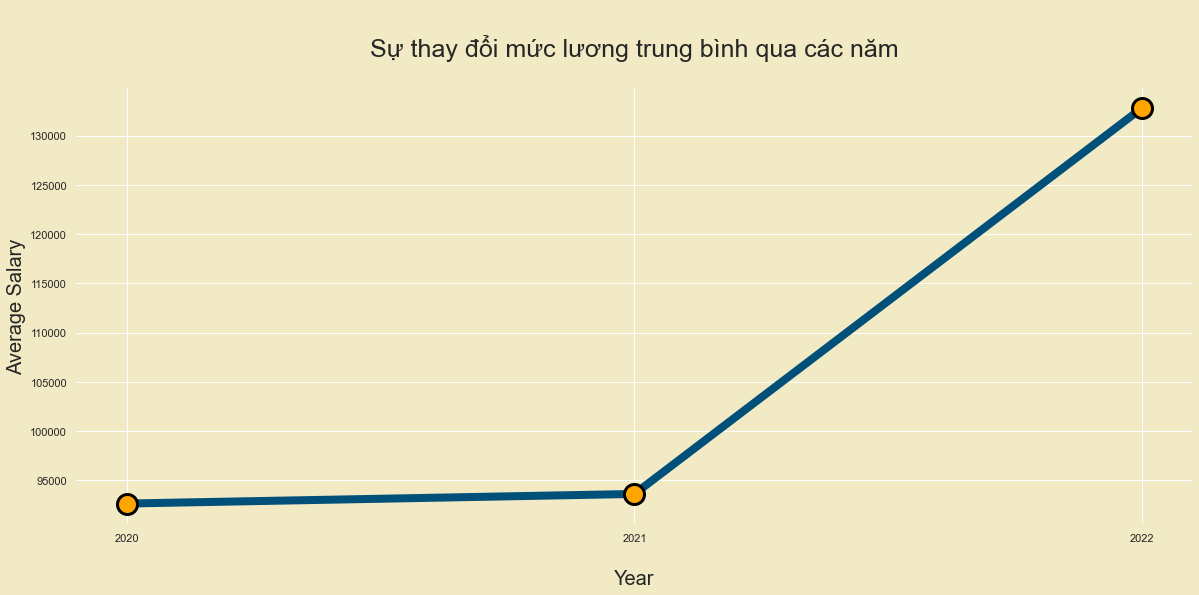

In [169]:
print(f"Chúng ta hãy nhìn vào sự thay đổi theo dòng thời gian của mức lương trung bình :")
plt.subplots(figsize=(20,8))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

p=sns.lineplot(x=salary_timeline["work_year"] ,y=salary_timeline["mean_salary_in_usd"],data=salary_timeline,color=palette[1],marker="o",linewidth=8,markersize=20,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\nSự thay đổi mức lương trung bình qua các năm\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Average Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

### Nhận xét

Mức lương trung bình trong lĩnh vực Khoa học dữ liệu có xu hướng tăng từ năm 2020 đến năm 2022:
- Tăng nhẹ trong khoảng từ 2020 đến 2021: từ 92644 - > 93616 (usd)
- Tăng mạnh trong khoảng từ 2021 đến 2022:  từ 93616 -> 132784 (usd)

Điều này cho thấy lĩnh vực Khoa học dữ liệu đang ngày càng đóng vai trò quan trọng, trở thành xu thế nghề nghiệp được ưa chuộng, nguồn nhân lực được các công ty trên thế giới sẳn sàng săn đón với mức lương hậu hĩnh.

## Câu hỏi 2:

### Nội dung câu hỏi 
Đâu là mảnh đất lý tưởng cho việc lựa chọn nơi làm việc cho các nghành thuộc lĩnh vực Khoa học dữ liệu? 

### Ý nghĩa khi trả lời được câu hỏi
Giúp cho người tìm việc chọn được các quốc gia nơi mà lĩnh vực Khoa học dữ liệu đang phát triển, sẵn sàng chi trả cho nguồn nhân lực với mức lương hấp dẫn. 

### Tiền xử lý

Để trả lời được câu hỏi này một cách sinh động nhất, chúng ta sẽ xử lý dữ liệu để có thể trực quan hóa kết quả trên bản đồ thế giới (sử dụng thư viện px.choropleth)

Cách xử lý: Để sử dụng được thư viện px.choropleth, thì tên của quốc gia phải ở dạng ISO (Tổ chức tiêu chuẩn hoá quốc tế), vì vậy cần phải chuyển đổi giá trị cột 'company_location' về dạng mã ISO.


**Code**

In [170]:
country_names = coco.convert(names=salaries_df['company_location'], to="ISO3")
salaries_df['company_location'] = country_names
print(f"Sau khi chuyển tên quốc gia về mã ISO ta có :")
salaries_df['company_location']

Sau khi chuyển tên quốc gia về mã ISO ta có :


0       USA
1       USA
2       USA
3       USA
4       USA
       ... 
1418    USA
1419    USA
1420    USA
1421    USA
1422    IND
Name: company_location, Length: 1423, dtype: object

### Phân tích dữ liệu để trả lời cho các câu hỏi

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:

Bước 1: Tạo dataframe 'average_salary' gồm có 2 thuộc tính là 'company_location' và 'mean_salary_in_usd':
- 'company_location': thể hiện mã các quốc gia theo ISO.
- 'mean_salary_in_usd': thể hiện giá trị trung bình về lương (trong vòng 3 năm) của các quốc gia tương ứng.

Bước 2: 
- Tiến hành trực quan hóa bằng biểu đồ choropleth (thư viện plotly.express) trong đó: giá trị mức lương trung bình (mean_salary_in_usd) của từng quốc gia (company_location) sẽ được hiển thị theo màu sắc trên bảng đồ thế giới.
- Điều chỉnh các tham số và thiết kế các layout sao cho hình ảnh trực quan được rõ ràng và đẹp mắt. 

**Code bước 1:**

In [171]:
salary_location_df = salaries_df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
average_salary = salary_location_df.groupby('company_location').mean().reset_index()
average_salary.rename(columns = {'salary_in_usd':'mean_salary_in_usd'}, inplace = True)
average_salary = average_salary[['company_location','mean_salary_in_usd']]
print(f"Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này :")
average_salary

Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này :


,company_location,mean_salary_in_usd
0,ALB,2324.000000
1,ARE,100000.000000
2,ARG,50000.000000
3,ASM,34026.500000
4,AUS,83578.250000
5,AUT,71377.666667
6,BEL,76895.250000
7,BOL,7500.000000
8,BRA,34396.454545
9,CAN,110812.200000


**Code bước 2:**

Chúng ta hãy nhìn vào mức lương trung bình của các quốc gia:


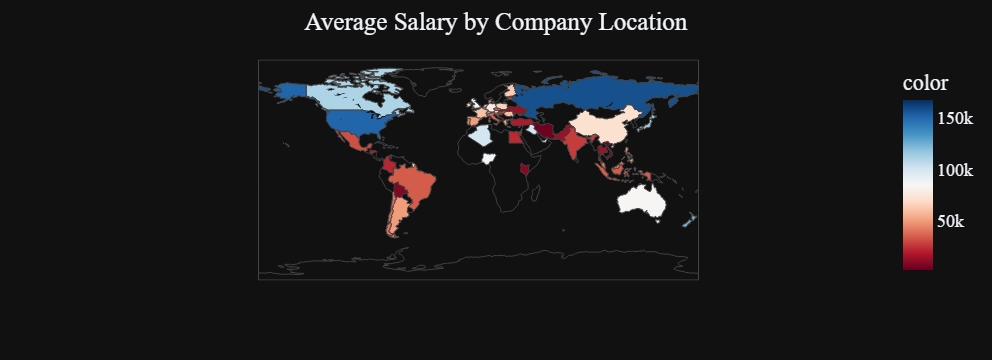

In [173]:
print(f"Chúng ta hãy nhìn vào mức lương trung bình của các quốc gia:")

fig = px.choropleth(locations=average_salary['company_location'],
                    color=average_salary['mean_salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.RdBu,
                    template='plotly_dark')
fig.update_layout(font = dict(size=17,family="Courier new"))

fig.update_layout(
    title="Average Salary by Company Location", title_x=0.5,
    font=dict(
        family="Rubik",
        size=18
    )
)

fig.show()

### Nhận xét
Dựa vào hình ảnh được trực quan ta có thể thấy, các quốc gia có mức lương trung bình rất cao đó là: Nga (157.5k), Mỹ (151.1707k), New Zealand (125k), Nhật Bản (114.1273k), Canada (110.8122k). 

Đây đều là nhưng quốc gia phát triển hàng đầu thế giới về mọi lĩnh vực và các quốc gia này sẵn sàng chi trả mức lương cho nguồn nhân lực trong lĩnh vực Khoa học dữ liệu rất hậu hĩnh. Điều đó chứng tỏ Khoa học dữ liệu là một lĩnh vực nghề nghiệp quan trọng trong sự phát triển của đất nước và người lao động có thể cân nhắc lựa chọn các quốc gia này để phát triển sự nghiệp và có mức thu nhập tốt.